In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
import cufflinks as cf
import seaborn as sns
import scikitplot as skplt


#recuerda cambiar credenciales por si quieres correr graficos interactivos en tu cuenta
import pickle
plotly.tools.set_credentials_file(username='serch86', api_key='CRERaPcTEkzAaTzJ4N8t')

plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('max_rows', 200)
pd.set_option('max_columns', 50)

font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

%matplotlib inline

In [3]:
datos = pd.read_excel('D://Users/MRT13933/NaremiProject/Datos/todoslosmeses.xlsx')

In [4]:
datos.describe()

coedisp           abso         albedo         extinc  \
count  240958.000000  228263.000000  227617.000000  227617.000000   
mean       14.508450       4.183612       0.771034      19.072077   
std        10.178959       3.831417       0.121241      12.543635   
min         0.000008       0.000000       0.000005       0.051880   
25%         7.190000       1.890000       0.703753       9.970000   
50%        12.100000       3.130000       0.788504      16.130000   
75%        19.200000       5.160000       0.857377      25.000000   
max        93.500000      81.700000       1.000000     135.100000   

                  cn  
count  228263.000000  
mean        0.890130  
std         0.815195  
min         0.000000  
25%         0.402128  
50%         0.665957  
75%         1.097870  
max        17.383000

In [5]:
datos.head()

hora      fecha  coedisp  abso    albedo  extinc        cn
0  00:02:00 2017-01-01     19.2  3.51  0.845443   22.71  0.746809
1  00:03:00 2017-01-01     18.8  3.59  0.839661   22.39  0.763830
2  00:04:00 2017-01-01     25.8  4.03  0.864901   29.83  0.857447
3  00:05:00 2017-01-01     20.3  3.82  0.841625   24.12  0.812766
4  00:06:00 2017-01-01     19.7  3.94  0.833333   23.64  0.838298

In [6]:
datos.fecha.unique()

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
       '2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
       '2017-01-07T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-09T00:00:00.000000000', '2017-01-10T00:00:00.000000000',
       '2017-01-11T00:00:00.000000000', '2017-01-12T00:00:00.000000000',
       '2017-01-13T00:00:00.000000000', '2017-01-14T00:00:00.000000000',
       '2017-01-15T00:00:00.000000000', '2017-01-16T00:00:00.000000000',
       '2017-01-17T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-19T00:00:00.000000000', '2017-01-20T00:00:00.000000000',
       '2017-01-21T00:00:00.000000000', '2017-01-22T00:00:00.000000000',
       '2017-01-23T00:00:00.000000000', '2017-01-24T00:00:00.000000000',
       '2017-01-25T00:00:00.000000000', '2017-01-26T00:00:00.000000000',
       '2017-01-27T00:00:00.000000000', '2017-01-28

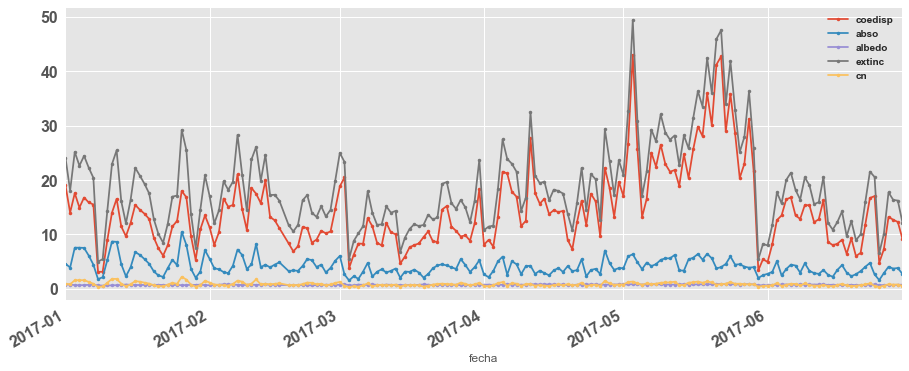

In [26]:
datos.groupby('fecha').mean().plot(figsize=(15,6), style='.-')

In [29]:
datos.groupby(['fecha', 'hora']).mean().iplot()

TypeError: sequence item 0: expected string, Timestamp found

In [28]:
datos.groupby('fecha').median().iplot(asUrl=True )

u'https://plot.ly/~serch86/1044'

In [33]:
datos.groupby('hora').median().iplot(asUrl=True )

u'https://plot.ly/~serch86/1046'

In [6]:
#datos_pre['Month'] = datos_pre['rec1'].dt.month
datos['mes'] = datos.fecha.dt.month

In [7]:
datos['time'] = pd.to_datetime(datos['hora'], format='%H:%M:%S').dt.time

In [8]:
df_hora = pd.DataFrame(datos.time.astype('str').str.split(':').tolist(),
             columns=['hour', 'minute','seconds']).astype(int)

In [9]:
datos = pd.concat([datos,df_hora],1)

In [10]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',
           10: 'Oct', 11: 'Nov', 12: 'Dec'}

datos['Month'] = datos['mes'].apply(lambda x: look_up[x])

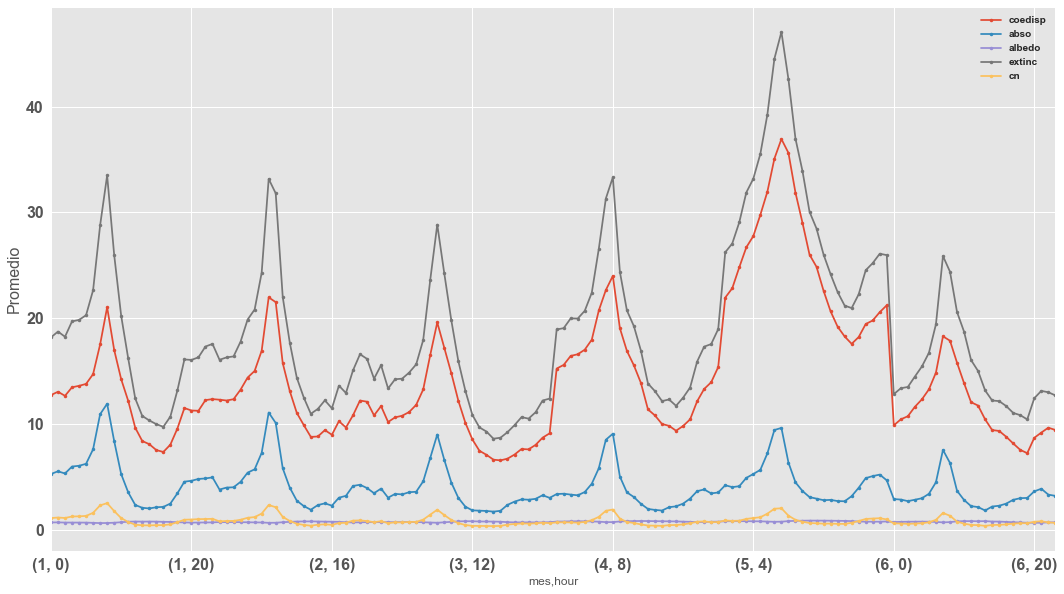

In [60]:
datos.groupby(
    ['mes',
     'hour'])[u'coedisp', u'abso', u'albedo', u'extinc', u'cn'].mean().plot(
         figsize=(18, 10), style='.-')
plt.ylabel('Promedio', fontsize=16)

In [76]:
import cufflinks as cf
datos.groupby(
    ['mes_2','hour_2'])[u'coedisp', u'abso', u'albedo', u'extinc', u'cn'].mean().sort_index().iplot(
    )

In [11]:
datos['hour_2'] = datos.hour.astype(str)
datos['mes_2'] = datos.mes.astype(str)

In [87]:
datos.groupby(
    ['mes_2','hour_2'])[u'coedisp', u'abso', u'albedo', u'extinc', u'cn'].mean().sort_index(
    level=[0,1], ascending=True)

coedisp      abso   albedo    extinc       cn
mes_2 hour_2                                                
1     0      12.743325  5.289995 0.715676 18.190349 1.125531
      1      13.058794  5.544444 0.719336 18.745807 1.179669
      10     14.239964  5.278240 0.735274 20.225266 1.123030
      11     12.198317  3.553254 0.780394 16.206911 0.756011
      12      9.662081  2.364460 0.799291 12.425059 0.503077
      13      8.403442  2.100383 0.793040 10.774312 0.446890
      14      8.107363  2.035031 0.798584 10.348657 0.432985
      15      7.549842  2.149312 0.790791  9.999979 0.457300
      16      7.371508  2.183549 0.770729  9.746748 0.464585
      17      8.059287  2.494934 0.763990 10.707354 0.530837
      18      9.582237  3.460343 0.734045 13.177654 0.736243
      19     11.518800  4.565871 0.713718 16.107823 0.971462
      2      12.674916  5.337562 0.703903 18.254756 1.135652
      20     11.287582  4.648295 0.698091 16.066325 0.988999
      21     11.262962  4.823223 0.705230 16.312314 1.026218
      22     12.272031  4.869296 0.718279 17.331466 1.036020
      23     12.362443  4.972695 0.717335 17.579050 1.058020
      3      13.481224  5.994878 0.703298 19.706223 1.275506
      4      13.618264  6.067844 0.706245 19.843897 1.291031
      5      13.800491  6.251943 0.698822 20.292356 1.330201
      6      14.722629  7.625378 0.678248 22.649334 1.622421
      7      17.525649 10.935782 0.653194 28.775399 2.326762
      8      21.042875 11.924609 0.661387 33.497168 2.537151
      9      17.015973  8.406223 0.687970 25.998292 1.788558
2     0      12.309041  3.819888 0.754332 16.079332 0.812742
      1      12.232249  4.007112 0.741177 16.302308 0.852577
      10     13.130589  4.003584 0.769232 17.706298 0.851827
      11     11.066292  2.772168 0.800375 14.388386 0.589823
      12      9.905049  2.257495 0.809421 12.505549 0.480318
      13      8.794560  1.915064 0.813394 10.977793 0.407460
      14      8.832567  2.356919 0.800803 11.439531 0.501472
      15      9.432997  2.515481 0.788263 12.245362 0.535209
      16      8.996320  2.302038 0.781798 11.496413 0.489795
      17     10.275735  3.051653 0.769741 13.635719 0.649288
      18      9.681393  3.229741 0.732104 12.940547 0.687179
      19     10.828459  4.160119 0.712967 15.071030 0.885132
      2      12.355284  4.035391 0.749859 16.397982 0.858594
      20     12.229757  4.273944 0.727077 16.600621 0.909350
      21     12.119405  3.963360 0.741998 16.165999 0.843268
      22     10.828213  3.477363 0.741311 14.290054 0.739864
      23     11.702149  3.912581 0.743601 15.569437 0.832464
      3      13.263408  4.551939 0.736633 17.797547 0.968498
      4      14.399729  5.418171 0.726089 19.878918 1.152802
      5      15.025655  5.732097 0.719691 20.826719 1.219595
      6      16.928501  7.285605 0.710276 24.295881 1.550129
      7      21.971421 11.096247 0.679915 33.164114 2.360903
      8      21.524743 10.112501 0.685624 31.801022 2.151596
      9      15.763867  5.830196 0.734686 22.008406 1.240467
3     0      10.201222  3.052191 0.749834 13.368858 0.649402
      1      10.641599  3.409773 0.742404 14.241243 0.725484
      10     12.215994  3.035451 0.813642 15.958429 0.645841
      11     10.129632  2.205876 0.831575 13.157950 0.469335
      12      8.551944  1.855154 0.825808 10.874089 0.394714
      13      7.487436  1.827767 0.805113  9.691744 0.388887
      14      7.102929  1.799096 0.805122  9.300611 0.382786
      15      6.643127  1.735637 0.796622  8.624380 0.369284
      16      6.578707  1.812983 0.782581  8.716503 0.385741
      17      6.737565  2.375415 0.741555  9.241424 0.505408
      18      7.123744  2.680175 0.720011  9.904104 0.570250
      19      7.651729  2.893567 0.721215 10.660470 0.615652
      2      10.791391  3.364384 0.750806 14.295900 0.715826
      20      7.615169  2.862052 0.722138 10.521721 0.608947
      21      8.040283  2.943261 0.720387 11.122095 0.626226
      22      8.723353  3.283098 0.719990 12.23262

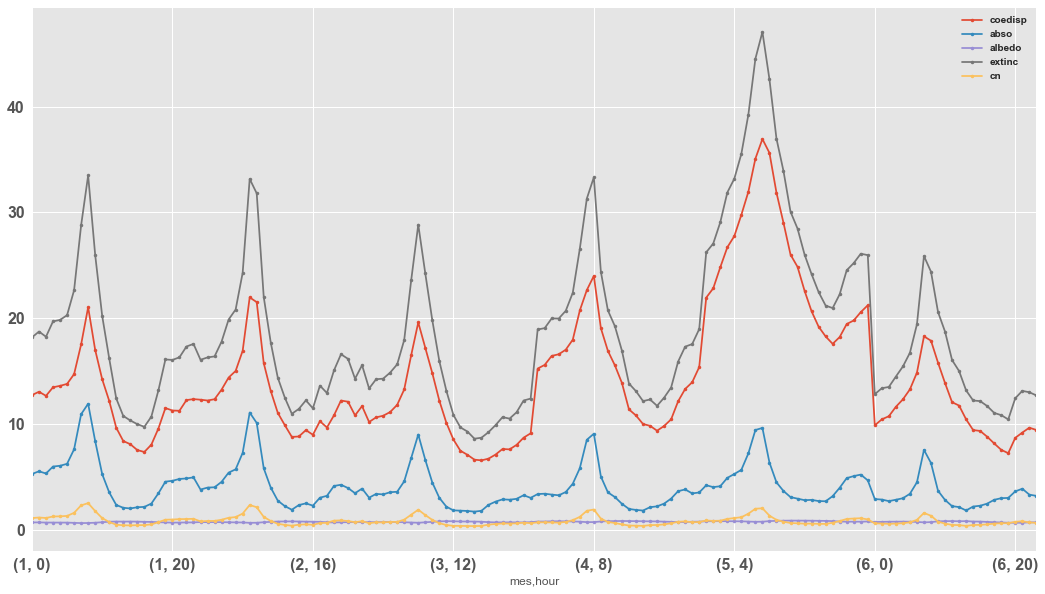

In [93]:
datos.groupby(['mes','hour'])[u'coedisp', u'abso', u'albedo', u'extinc', u'cn'].mean().plot(
    figsize=(18, 10), style='.-')
#plt.xticks

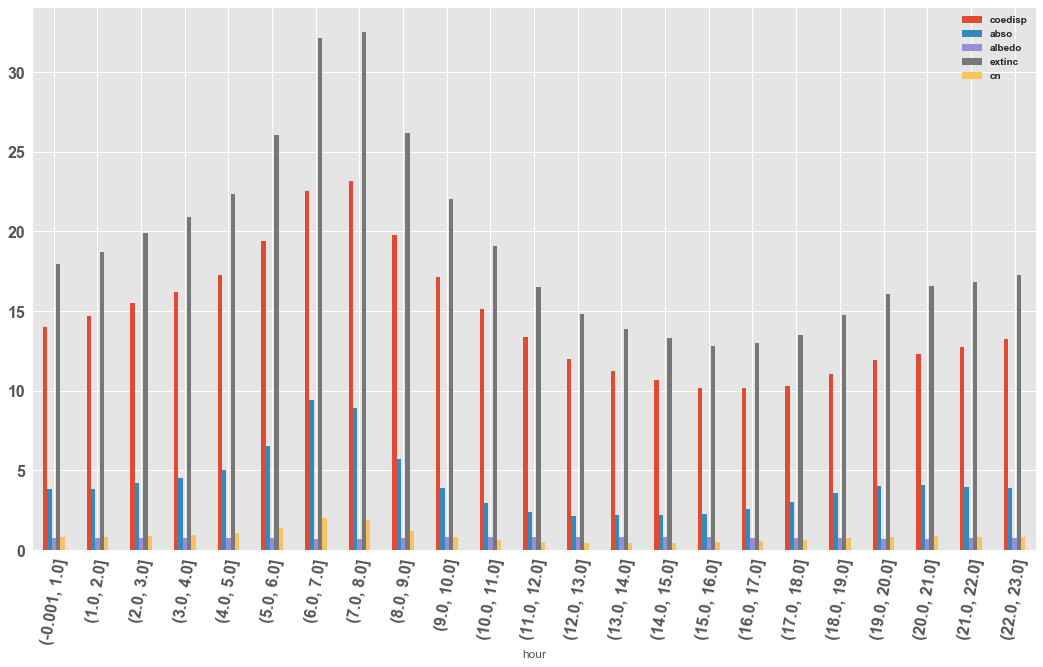

In [27]:
datos.groupby(pd.qcut(datos.hour,np.linspace(0,1,24)))[
    u'coedisp', u'abso', u'albedo', u'extinc', u'cn'].mean().plot.bar(figsize=(18, 10), rot =80)